In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import matplotlib.cm as cm
import math
import os


files=[]
for (dirpath, dirnames, filenames) in os.walk("frames/"):
	files.extend(["frames/"+filenamest for filenamest in filenames if "DS_Store" not in filenamest])
	break
files = sorted(files)
print(files)
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
plt.clf()

def readData(i):
	#print(i)
	plt.clf() ## CLEARS THE PROJECTIONS
	data=[]
	data=np.loadtxt(files[i])

	data = list(zip(*data))
	#print (data)
	x=data[1]
	y=data[2]
	colors=data[0]
	size=[100*i*i for i in data[3]]
	plt.scatter(x, y, c='black', s=size, vmin=-0.25, vmax=2.5, edgecolors="none", cmap = cm.get_cmap("Spectral"))
	## DRAW PBC BOX -> RED
    plt.plot([-24,24],[-24,-24],"r-", linewidth = 2.5) ## xmin to xmax at ymin
    plt.plot([-24,24],[24,24],"r-", linewidth = 2.5) ## xmin to xmax at ymax
    plt.plot([-24,-24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmin
    plt.plot([24,24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmax
    plt.xlim([-80,80])
    plt.ylim([-80,80])
    ax.spines["left"].set_position(("axes", 1))
    ax.spines["bottom"].set_position(("axes",1))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    plt.axis("on")
    plt.subplots_adjust(left=-0.205,bottom=-0.205,right=1.05,top=1.05)


anim = ani.FuncAnimation(fig,readData,frames=len(files), blit=False)
anim.save("animation.gif", fps=10)#, extra_args=["-vcodec", "libx264"])






[]


<Figure size 1440x1440 with 0 Axes>

In [6]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Delaunay
from collections import defaultdict
from itertools import permutations
from scipy.spatial import distance
import matplotlib.animation as ani
import matplotlib.cm as cm
import math
import os


In [ ]:
x=data[1]
y=data[2]
colors=data[0]
size=[100*i*i for i in data[3]]
plt.scatter(x, y, c='black', s=size, vmin=-0.25, vmax=2.5, edgecolors="none", cmap = cm.get_cmap("Spectral"))
## DRAW PBC BOX -> RED
plt.plot([-40,40],[-40,-40],"r-", linewidth = 2.5) ## xmin to xmax at ymin
plt.plot([-40,40],[40,40],"r-", linewidth = 2.5) ## xmin to xmax at ymax
plt.plot([-40,-40],[-40,40],"r-", linewidth = 2.5) ## ymin to ymax at xmin
plt.plot([40,40],[-40,40],"r-", linewidth = 2.5) ## ymin to ymax at xmax
plt.xlim([-80,80])
plt.ylim([-80,80])
ax.spines["left"].set_position(("axes", 1))
ax.spines["bottom"].set_position(("axes",1))
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.axis("on")



In [ ]:
df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
points = df[[1,2]].to_numpy()

In [5]:
# Now I will make the graph
# First I add all the points to the graph
G = nx.Graph()
for i in range(len(points)):
  G.add_node(i)
print('G num nodes: ' + str(G.number_of_nodes()))

G num nodes: 144


In [7]:
# Now I will only keep edges within a certain distance
G.remove_edges_from(G.edges())
for k in neighbors:
    node1 = k
    for j in neighbors[k]:
      node2 = j
      if distance.euclidean(points[node1],points[node2]) < 4:
        G.add_edge(node1,node2)
print('G num edges: ' + str(G.number_of_edges()))

G num edges: 288


Text(0.5, 1.0, 'Graph')

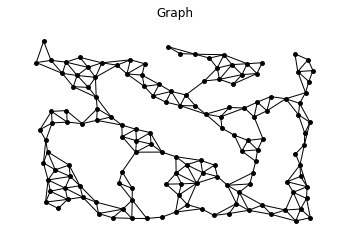

In [8]:
# plot the new result
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k', node_size = 15, ax=ax)
plt.title('Graph')

Text(0.5, 1.0, 'Graph')

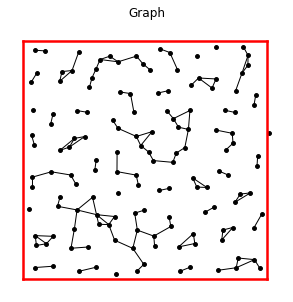

In [26]:
file_name = "/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/time/codes1/velocity_0.01noise_6.0gap_1.0neigh_1.0angle_2/7/video/frames/fr009999" 

df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
points = df[[1,2]].to_numpy()
tri = Delaunay(points)
_neighbors = defaultdict(set)
for simplex in tri.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors[i].add(j)
#list those neighbors via their index
points = [tuple(p) for p in tri.points]
neighbors = {}
for k, v in _neighbors.items():
    neighbors[k] = [y for y in v]
G = nx.Graph()
for p in range(len(points)):
    G.add_node(p)
pos = {}
for e in neighbors:
    d = points[e]
    pos[e] = [s for s in d]    
G.remove_edges_from(G.edges())
for h in neighbors:
    node1 = h
    for g in neighbors[h]:
        node2 = g
        if distance.euclidean(points[node1],points[node2]) < 4:
            G.add_edge(node1,node2)
            
fig, ax = plt.subplots(figsize=(5,5))
plt.plot([-24,24],[-24,-24],"r-", linewidth = 2.5) ## xmin to xmax at ymin
plt.plot([-24,24],[24,24],"r-", linewidth = 2.5) ## xmin to xmax at ymax
plt.plot([-24,-24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmin
plt.plot([24,24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmax
nx.draw(G, pos=pos, node_color='k', node_size = 15, ax=ax)
plt.title('Graph')

MovieWriter ffmpeg unavailable; using Pillow instead.
/var/folders/g4/21xnclh939d4qj7_fdhdc19m0000gn/T/ipykernel_57629/1308901709.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

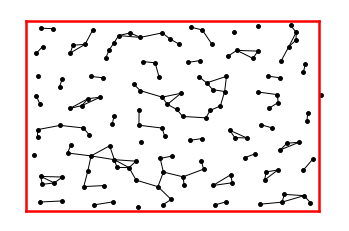

In [89]:
files=[]
for (dirpath, dirnames, filenames) in os.walk("codes1/velocity_0.01noise_6.0gap_"+str(1.0)+"neigh_1.0angle_2/"+str(7)+"/video/frames1/"):
    files.extend(["codes1/velocity_0.01noise_6.0gap_"+str(1.0)+"neigh_1.0angle_2/"+str(7)+"/video/frames1/"+filenamest for filenamest in filenames if "DS_Store" not in filenamest])
    break
files = sorted(files)
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
plt.clf()


def animate(i):
    #print(i)
    plt.clf() ## CLEARS THE PROJECTIONS
    df = pd.read_csv(files[o], sep="\s+",header = None,usecols=[1,2])
    points = df[[1,2]].to_numpy()
    tri = Delaunay(points)
    _neighbors = defaultdict(set)
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
    #list those neighbors via their index
    points = [tuple(p) for p in tri.points]
    neighbors = {}
    for k, v in _neighbors.items():
        neighbors[k] = [y for y in v]
    G = nx.Graph()
    for p in range(len(points)):
        G.add_node(p)
    pos = {}
    for e in neighbors:
        d = points[e]
        pos[e] = [s for s in d]    
    G.remove_edges_from(G.edges())
    for h in neighbors:
        node1 = h
        for g in neighbors[h]:
            node2 = g
            if distance.euclidean(points[node1],points[node2]) < 4:
                G.add_edge(node1,node2)

    fig, ax = plt.subplots()
    plt.plot([-24,24],[-24,-24],"r-", linewidth = 2.5) ## xmin to xmax at ymin
    plt.plot([-24,24],[24,24],"r-", linewidth = 2.5) ## xmin to xmax at ymax
    plt.plot([-24,-24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmin
    plt.plot([24,24],[-24,24],"r-", linewidth = 2.5) ## ymin to ymax at xmax
    nx.draw(G, pos=pos, node_color='k', node_size = 15, ax=ax)

anim = ani.FuncAnimation(fig, animate,frames = len(files), blit = False)
anim.save('trial.gif', writer = 'ffmpeg', fps = 20)
